In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv("train_loan_preprocess.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.shape

(614, 13)

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
def get_numerical_summary(df):
  total_rows=df.shape[0]
  missing_cols=[col for col in df.columns if df[col].isnull().sum()>0]
  missing_percent={}

  for col in missing_cols:
    null_count=df[col].isnull().sum()
    per=(null_count/total_rows)*100
    missing_percent[col]=per
    print(f'{col}: {null_count},({round(per,3)})')
  return missing_percent

In [8]:
miss_per=get_numerical_summary(df)

Gender: 13,(2.117)
Married: 3,(0.489)
Dependents: 15,(2.443)
Self_Employed: 32,(5.212)
LoanAmount: 22,(3.583)
Loan_Amount_Term: 14,(2.28)
Credit_History: 50,(8.143)


In [9]:
freqgrph=df.select_dtypes(include=['float'])

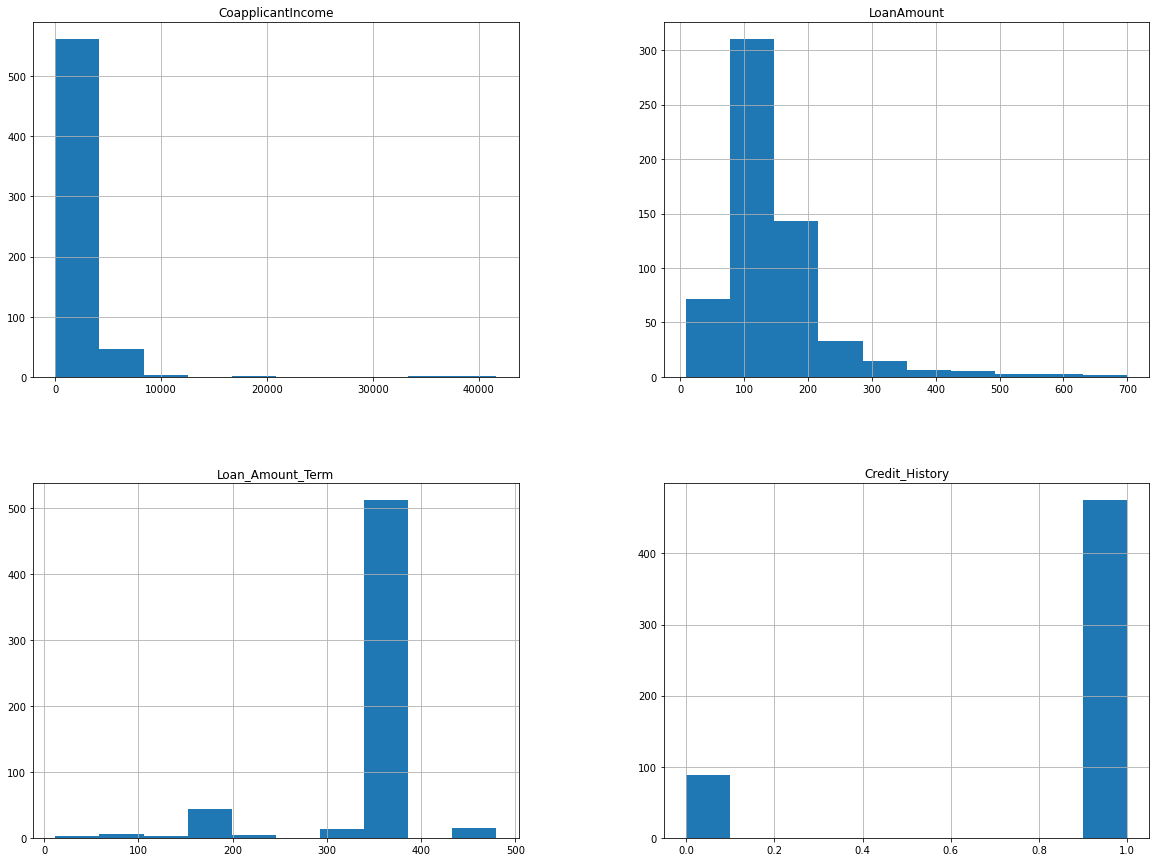

In [10]:
freqgrph.hist(figsize=(20,15))
plt.show()

In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
for i in ['LoanAmount','Loan_Amount_Term', 'Credit_History']:
    df[i]=df[i].fillna(df[i].median())

In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
for i in ['Gender', 'Married', 'Dependents','Self_Employed']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [15]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
y_pred=lr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.276417791389053

OUTLIER DETECTION USING IQR METHOD

In [16]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
    Q1=df[i].quantile(0.25)
    Q2=df[i].quantile(0.50)
    Q3=df[i].quantile(0.75)
    iqr=Q3-Q1
    lower=Q1-(1.5*iqr)
    upper=Q3+(1.5*iqr)
    print(df[(df[i]<lower) | (df[i]>upper)].index)

Int64Index([  9,  34,  54,  67, 102, 106, 115, 119, 126, 128, 130, 138, 144,
            146, 155, 171, 183, 185, 191, 199, 254, 258, 271, 278, 284, 308,
            324, 333, 369, 370, 409, 424, 432, 438, 443, 467, 475, 478, 483,
            487, 493, 506, 509, 525, 533, 534, 561, 572, 594, 604],
           dtype='int64')
Int64Index([  9,  12,  38, 122, 135, 177, 180, 253, 349, 372, 402, 417, 444,
            506, 513, 523, 581, 600],
           dtype='int64')
Int64Index([  5,   9,  21,  34,  54,  67,  83, 126, 130, 135, 155, 161, 171,
            177, 233, 253, 258, 260, 278, 308, 324, 325, 333, 351, 369, 372,
            381, 391, 409, 432, 487, 506, 514, 523, 525, 536, 561, 572, 592,
            600, 604],
           dtype='int64')
Int64Index([ 14,  16,  62,  66,  68,  72,  75,  78,  84,  91,  94,  98, 100,
            109, 115, 128, 130, 133, 142, 144, 155, 164, 168, 171, 172, 179,
            182, 186, 189, 202, 228, 231, 241, 242, 245, 247, 248, 253, 262,
            282, 286, 2

OUTLIER DETECTION USING Z-SCORE METHOD

In [17]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']:
    z_scores = np.abs(stats.zscore(df[i]))
    threshold = 3
    outliers = np.where(z_scores > threshold)
    print(f"Outliers at: {outliers}")

Outliers at: (array([126, 155, 171, 183, 185, 333, 409, 443], dtype=int64),)
Outliers at: (array([  9, 177, 402, 417, 581, 600], dtype=int64),)
Outliers at: (array([130, 155, 171, 177, 278, 308, 333, 369, 432, 487, 506, 523, 525,
       561, 604], dtype=int64),)
Outliers at: (array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64),)
Outliers at: (array([], dtype=int64),)


In [19]:
numeric_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

In [29]:
for col in numeric_cols:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.85)
    df[col] = np.clip(df[col], lower_bound, upper_bound)
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0            5849.00                0.0       128.0           

In [30]:
for i in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    z_scores = np.abs(stats.zscore(df[i]))
    threshold = 3
    outliers = np.where(z_scores > threshold)
    print(f"Outliers at: {outliers}")

Outliers at: (array([], dtype=int64),)
Outliers at: (array([], dtype=int64),)
Outliers at: (array([], dtype=int64),)


In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
for i in ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']:
    print(f'{i} : {df[i].nunique()}')

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
Property_Area : 3
Loan_Status : 2


In [33]:
df_t=df.copy()

In [34]:
df_t.drop('Loan_ID',axis=1,inplace=True)

In [35]:
df_t.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [36]:
from sklearn.preprocessing import LabelEncoder


In [38]:
for i in ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']:
    le=LabelEncoder()
    df_t[i]=le.fit_transform(df_t[i])

In [39]:
df_t.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [40]:
df_t.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [42]:
x=df_t.drop('Loan_Status',axis=1)
y=df_t['Loan_Status']

In [43]:
x1=x.copy()
x1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [44]:
x1.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Property_Area'],axis=1,inplace=True)
x1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1=scaler.fit_transform(x1)

In [46]:
x1=pd.DataFrame(x1,columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'])

In [47]:
x1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.695592,0.000000,0.540520,0.74359,1.0
1,0.472732,0.493835,0.540520,0.74359,1.0
2,0.194069,0.000000,0.066514,0.74359,1.0
3,0.120663,0.772191,0.479358,0.74359,1.0
4,0.722173,0.000000,0.639908,0.74359,1.0


In [48]:
x2=x.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History'],axis=1)
x=pd.concat([x1,x2],axis=1)
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0.695592,0.000000,0.540520,0.74359,1.0,1,0,0,0,0,2
1,0.472732,0.493835,0.540520,0.74359,1.0,1,1,1,0,0,0
2,0.194069,0.000000,0.066514,0.74359,1.0,1,1,0,0,1,2
3,0.120663,0.772191,0.479358,0.74359,1.0,1,1,0,1,0,2
4,0.722173,0.000000,0.639908,0.74359,1.0,1,0,0,0,0,2
